In [28]:
import re
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [29]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [30]:
pip install nltk

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [31]:
# Download required NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ki_shari\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ki_shari\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ki_shari\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [32]:
# Remove punctuation marks, special characters, and HTML tags
def remove_special_chars(text):
    # Remove HTML tags
    clean_text = re.sub(r'<.*?>', '', text)
    # Remove punctuation and special characters
    clean_text = re.sub(r'[^\w\s]', '', clean_text)
    return clean_text

# Tokenization, lowercase, and stop words removal
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text.lower())
    # Stop words removal
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token not in stop_words]
    return filtered_tokens

# Stemming and Lemmatization
def apply_stemming_and_lemmatization(tokens):
    stemmer = PorterStemmer()
    lemmatizer = WordNetLemmatizer()
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in stemmed_tokens]
    return lemmatized_tokens

In [33]:
dataset = pd.read_csv(r'C:\Users\ki_shari\Downloads\DF.csv', encoding='latin-1')

In [34]:
dataset.loc[dataset["LABEL"] == "__label1__", "LABEL"] = 1
dataset.loc[dataset["LABEL"] == "__label2__", "LABEL"] = 0
dataset['LABEL']=pd.to_numeric(dataset['LABEL'])

In [35]:
# Preprocessing steps
dataset['ORIGINAL_TEXT'] = dataset['REVIEW_TEXT']  # Create a new column to store the original reviews

dataset['REVIEW_TEXT'] = dataset['REVIEW_TEXT'].apply(remove_special_chars)
dataset['REVIEW_TEXT'] = dataset['REVIEW_TEXT'].apply(preprocess_text)
dataset['REVIEW_TEXT'] = dataset['REVIEW_TEXT'].apply(apply_stemming_and_lemmatization)


# Convert labels to numerical values
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(dataset['LABEL'])

# Convert tokens to numerical tokens and padding
all_tokens = dataset['REVIEW_TEXT'].tolist()
tokenizer1 = Tokenizer()
tokenizer1.fit_on_texts(all_tokens)
word_index = tokenizer1.word_index

encoded_tokens = [[word_index.get(token, 0) for token in tokens] for tokens in all_tokens]
padded_tokens = pad_sequences(encoded_tokens, padding='post')

In [114]:
dataset.head(5)

DOC_ID  LABEL  RATING VERIFIED_PURCHASE PRODUCT_CATEGORY  PRODUCT_ID  \
0       1      1       4                 N               PC  B00008NG7N   
1       2      1       4                 Y         Wireless  B00LH0Y3NM   
2       3      1       3                 N             Baby  B000I5UZ1Q   
3       4      1       4                 N  Office Products  B003822IRA   
4       5      1       4                 N           Beauty  B00PWSAXAM   

                                       PRODUCT_TITLE  \
0        Targus PAUK10U Ultra Mini USB Keypad, Black   
1  Note 3 Battery : Stalion Strength Replacement ...   
2       Fisher-Price Papasan Cradle Swing, Starlight   
3  Casio MS-80B Standard Function Desktop Calculator   
4  Shine Whitening - Zero Peroxide Teeth Whitenin...   

               REVIEW_TITLE  \
0                    useful   
1     New era for batteries   
2  doesn't swing very well.   
3          Great computing!   
4     Only use twice a week   

                                         REVIEW_TEXT     INCON  \
0  [least, think, product, save, day, keep, aroun...  4.000000   
1  [lithium, batteri, someth, new, introduc, mark...  3.987500   
2  [purchas, swing, babi, 6, month, pretti, much,...  2.954545   
3  [look, inexpens, desk, calcolatur, work, every...  4.000000   
4  [use, twice, week, result, great, use, teeth, ...  4.000000   

                                       ORIGINAL_TEXT  \
0  When least you think so, this product will sav...   
1  Lithium batteries are something new introduced...   
2  I purchased this swing for my baby. She is 6 m...   
3  I was looking for an inexpensive desk calcolat...   
4  I only use it twice a week and the results are...   

   rating_sentiment_inconsistency  normalized_scores   incon  sentiment  
0                        4.000000           0.726538  Medium   0.000000  
1                        3.987500           0.723638  Medium   0.012500  
2                        2.954545           0.483963     Low   0.045455  
3                        4.000000           0.726538  Medium   0.000000  
4                        4.000000           0.726538  Medium   0.000000

In [37]:
max_length = max(dataset['REVIEW_TEXT'], key=len)

# Print the maximum length
print("Maximum length:", len(max_length))

Maximum length: 1424


In [38]:
# Output the preprocessed data
for i, data in dataset.iterrows():
    print(f"Review {i + 1}:")
    print("Text:", data['REVIEW_TEXT'])
    print("Label:", data['LABEL'])
    encoded_tokens = [word_index.get(token, 0) for token in data['REVIEW_TEXT']]
    padded_tokens = pad_sequences([encoded_tokens], padding='post', maxlen=1424)
    print("Encoded Tokens:", padded_tokens[0])
    print()

Review 1:
Text: ['least', 'think', 'product', 'save', 'day', 'keep', 'around', 'case', 'need', 'someth']
Label: 1
Encoded Tokens: [339  57  11 ...   0   0   0]

Review 2:
Text: ['lithium', 'batteri', 'someth', 'new', 'introduc', 'market', 'averag', 'develop', 'cost', 'rel', 'high', 'stallion', 'doesnt', 'compromis', 'qualiti', 'provid', 'u', 'best', 'low', 'costther', 'mani', 'built', 'technic', 'assist', 'act', 'like', 'sensor', 'particular', 'fortãâ', 'batteri', 'keep', 'phone', 'charg', 'work', 'everi', 'voltag', 'high', 'voltag', 'never', 'risk']
Label: 1
Encoded Tokens: [4664   92  101 ...    0    0    0]

Review 3:
Text: ['purchas', 'swing', 'babi', '6', 'month', 'pretti', 'much', 'grown', 'loud', 'doesnt', 'swing', 'well', 'beauti', 'though', 'love', 'color', 'lot', 'set', 'dont', 'think', 'worth', 'money']
Label: 1
Encoded Tokens: [  33 1607  251 ...    0    0    0]

Review 4:
Text: ['look', 'inexpens', 'desk', 'calcolatur', 'work', 'everyth', 'need', 'issu', 'tilt', 'slightli'

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Encoded Tokens: [ 3 11 23 ...  0  0  0]

Review 11160:
Text: ['son', 'fascin', 'littl', 'triangl', 'toy', 'lot', 'great', 'color', 'durabl', 'activ', 'fun', 'infant', 'would', 'buy', 'babi', '6', 'mo']
Label: 0
Encoded Tokens: [ 192 2231   26 ...    0    0    0]

Review 11161:
Text: ['look', 'grade', 'b', 'scienc', 'fiction', 'movi', 'instead', 'got', 'grade', 'f', 'titl', 'end', 'worst', 'ever', 'seen', 'like', 'ran', 'film', 'dont', 'wast', 'like', 'product', 'isnt', 'worth']
Label: 0
Encoded Tokens: [   9 1416 2089 ...    0    0    0]

Review 11162:
Text: ['first', 'receiv', 'dent', 'outsid', 'return', 'second', 'came', 'day', 'later', 'first', 'use', 'hairlin', 'fractur', 'pot', 'cours', 'grew', 'within', 'three', 'month', 'weve', 'replac', 'anoth', 'brand', 'worth', 'money', 'cheapli', 'construct']
Label: 0
Encoded Tokens: [  46  130 2134 ...    0    0    0]

Review 11163:
Text: ['bought', 'even', 'though', '2', 'kakadu', 'hand', 'tri', 'fit', 'neighbor', 'chiyorki', 'mix', 'colla

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [94]:
dataset.head(5)

DOC_ID  LABEL  RATING VERIFIED_PURCHASE PRODUCT_CATEGORY  PRODUCT_ID  \
0       1      1       4                 N               PC  B00008NG7N   
1       2      1       4                 Y         Wireless  B00LH0Y3NM   
2       3      1       3                 N             Baby  B000I5UZ1Q   
3       4      1       4                 N  Office Products  B003822IRA   
4       5      1       4                 N           Beauty  B00PWSAXAM   

                                       PRODUCT_TITLE  \
0        Targus PAUK10U Ultra Mini USB Keypad, Black   
1  Note 3 Battery : Stalion Strength Replacement ...   
2       Fisher-Price Papasan Cradle Swing, Starlight   
3  Casio MS-80B Standard Function Desktop Calculator   
4  Shine Whitening - Zero Peroxide Teeth Whitenin...   

               REVIEW_TITLE  \
0                    useful   
1     New era for batteries   
2  doesn't swing very well.   
3          Great computing!   
4     Only use twice a week   

                                         REVIEW_TEXT     INCON  \
0  [least, think, product, save, day, keep, aroun...  4.000000   
1  [lithium, batteri, someth, new, introduc, mark...  3.987500   
2  [purchas, swing, babi, 6, month, pretti, much,...  2.954545   
3  [look, inexpens, desk, calcolatur, work, every...  4.000000   
4  [use, twice, week, result, great, use, teeth, ...  4.000000   

                                       ORIGINAL_TEXT  \
0  When least you think so, this product will sav...   
1  Lithium batteries are something new introduced...   
2  I purchased this swing for my baby. She is 6 m...   
3  I was looking for an inexpensive desk calcolat...   
4  I only use it twice a week and the results are...   

   rating_sentiment_inconsistency  normalized_scores   incon  sentiment  
0                        4.000000           0.726538  Medium   0.000000  
1                        3.987500           0.723638  Medium   0.012500  
2                        2.954545           0.483963     Low   0.045455  
3                        4.000000           0.726538  Medium   0.000000  
4                        4.000000           0.726538  Medium   0.000000

In [97]:
dataset['sentiment'].min()

-0.23026315789473684

In [40]:
dataset['RATING'].mean()

4.127952380952381

In [41]:
!pip install afinn

Defaulting to user installation because normal site-packages is not writeable


In [42]:
nltk.download('sentiwordnet')

[nltk_data] Downloading package sentiwordnet to
[nltk_data]     C:\Users\ki_shari\AppData\Roaming\nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!


True

In [43]:
from nltk.corpus import sentiwordnet as swn
from afinn import Afinn

In [44]:
#Initialize the Afinn sentiment analyzer:

afinn = Afinn()

In [45]:
#Define a function to calculate the sentiment score for a given token:

def calculate_sentiment_score(token):
    synsets = list(swn.senti_synsets(token))
    if synsets:
        # Use the first synset to calculate the sentiment score
        synset = synsets[0]
        sentiment_score = synset.pos_score() - synset.neg_score()
        return sentiment_score
    else:
        return 0.0

In [46]:
#Iterate over the preprocessed dataset and calculate the sentiment scores for each review:

sentiment_scores = []

for i, data in dataset.iterrows():
    tokens = data['REVIEW_TEXT']  # Assuming 'REVIEW_TEXT' contains the preprocessed list of tokens

    review_sentiment_scores = [calculate_sentiment_score(token) for token in tokens]
    sentiment_scores.append(review_sentiment_scores)

In [47]:
#Aggregate the sentiment scores

aggregated_scores = [sum(scores) / len(scores) if scores else 0.0 for scores in sentiment_scores]

In [73]:
dataset = dataset.assign(sentiment=aggregated_scores)

In [48]:
#Calculate the rating-sentiment inconsistency

rating_sentiment_inconsistency = [abs(aggregated_scores[i] - dataset['RATING'][i]) for i in range(len(dataset))]

In [49]:
print(sum(rating_sentiment_inconsistency)/len(rating_sentiment_inconsistency))

4.111933910765967


In [50]:
aggregated_scores[2]

0.045454545454545456

In [51]:
import numpy as np

# Calculate the rating-sentiment inconsistency
rating_sentiment_inconsistency = [abs(aggregated_scores[i] - dataset['RATING'][i]) for i in range(len(dataset))]

# Normalize the inconsistency scores using Min-Max scaling
min_score = min(rating_sentiment_inconsistency)
max_score = max(rating_sentiment_inconsistency)
normalized_scores = [(score - min_score) / (max_score - min_score) for score in rating_sentiment_inconsistency]

In [52]:
# Add the columns to the dataset
dataset = dataset.assign(rating_sentiment_inconsistency=rating_sentiment_inconsistency,
                         normalized_scores=normalized_scores)

In [53]:
dataset['normalized_scores'].describe()

count    21000.000000
mean         0.752510
std          0.295100
min          0.000000
25%          0.712036
50%          0.944065
75%          0.955930
max          1.000000
Name: normalized_scores, dtype: float64

<Axes: >

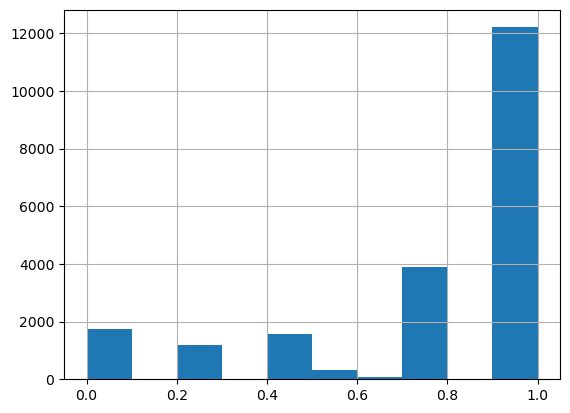

In [54]:
dataset['normalized_scores'].hist()

In [58]:
# Calculate the percentiles
percentiles = np.percentile(normalized_scores, [25, 75])

# Define the category labels
categories = ['Low', 'Medium', 'High']

# Convert numerical values to categorical values based on the rules
categorical_scores = np.zeros(len(normalized_scores), dtype=object)
for i, score in enumerate(normalized_scores):
    if score <= percentiles[0]:
        categorical_scores[i] = categories[0]
    elif score <= percentiles[1]:
        categorical_scores[i] = categories[1]
    else:
        categorical_scores[i] = categories[2]

In [59]:
dataset = dataset.assign(incon=categorical_scores)

In [38]:
dataset = dataset.drop('rating_sentiment_inconsistency', axis=1)

In [76]:
positive_fake_reviews = dataset[(dataset['LABEL'] == 1) & (dataset['RATING'] >= 3)]
positive_real_reviews = dataset[(dataset['LABEL'] == 0) & (dataset['RATING'] >= 3)]
negative_fake_reviews = dataset[(dataset['LABEL'] == 1) & (dataset['RATING'] < 3)]
negative_real_reviews = dataset[(dataset['LABEL'] == 0) & (dataset['RATING'] < 3)]

positive_fake_count = len(positive_fake_reviews)
positive_real_count = len(positive_real_reviews)
negative_fake_count = len(negative_fake_reviews)
negative_real_count = len(negative_real_reviews)

print("Positive Fake Reviews:", positive_fake_count)
print("Positive Real Reviews:", positive_real_count)
print("Negative Fake Reviews:", negative_fake_count)
print("Negative Real Reviews:", negative_real_count)

Positive Fake Reviews: 8984
Positive Real Reviews: 9067
Negative Fake Reviews: 1516
Negative Real Reviews: 1433


In [78]:
positive_fake_reviews = dataset[(dataset['LABEL'] == 1) & (dataset['sentiment'] >= 0)]
positive_real_reviews = dataset[(dataset['LABEL'] == 0) & (dataset['sentiment'] >= 0)]
negative_fake_reviews = dataset[(dataset['LABEL'] == 1) & (dataset['sentiment'] < 0)]
negative_real_reviews = dataset[(dataset['LABEL'] == 0) & (dataset['sentiment'] < 0)]

positive_fake_count = len(positive_fake_reviews)
positive_real_count = len(positive_real_reviews)
negative_fake_count = len(negative_fake_reviews)
negative_real_count = len(negative_real_reviews)

print("Positive Fake Reviews:", positive_fake_count)
print("Positive Real Reviews:", positive_real_count)
print("Negative Fake Reviews:", negative_fake_count)
print("Negative Real Reviews:", negative_real_count)

Positive Fake Reviews: 7604
Positive Real Reviews: 7263
Negative Fake Reviews: 2896
Negative Real Reviews: 3237


In [103]:
from scipy.stats import chi2_contingency

# Sentiment-based categorization
positive_sentiment_fake_reviews = dataset[(dataset['LABEL'] == 1) & (dataset['sentiment'] >= 0)]
positive_sentiment_real_reviews = dataset[(dataset['LABEL'] == 0) & (dataset['sentiment'] >= 0)]
negative_sentiment_fake_reviews = dataset[(dataset['LABEL'] == 1) & (dataset['sentiment'] < 0)]
negative_sentiment_real_reviews = dataset[(dataset['LABEL'] == 0) & (dataset['sentiment'] < 0)]

positive_sentiment_fake_count = len(positive_sentiment_fake_reviews)
positive_sentiment_real_count = len(positive_sentiment_real_reviews)
negative_sentiment_fake_count = len(negative_sentiment_fake_reviews)
negative_sentiment_real_count = len(negative_sentiment_real_reviews)

print("Positive Sentiment-Based Fake Reviews:", positive_sentiment_fake_count)
print("Positive Sentiment-Based Real Reviews:", positive_sentiment_real_count)
print("Negative Sentiment-Based Fake Reviews:", negative_sentiment_fake_count)
print("Negative Sentiment-Based Real Reviews:", negative_sentiment_real_count)

# Rating-based categorization
positive_rating_fake_reviews = dataset[(dataset['LABEL'] == 1) & (dataset['RATING'] >= 3)]
positive_rating_real_reviews = dataset[(dataset['LABEL'] == 0) & (dataset['RATING'] >= 3)]
negative_rating_fake_reviews = dataset[(dataset['LABEL'] == 1) & (dataset['RATING'] < 3)]
negative_rating_real_reviews = dataset[(dataset['LABEL'] == 0) & (dataset['RATING'] < 3)]

positive_rating_fake_count = len(positive_rating_fake_reviews)
positive_rating_real_count = len(positive_rating_real_reviews)
negative_rating_fake_count = len(negative_rating_fake_reviews)
negative_rating_real_count = len(negative_rating_real_reviews)

print("Positive Rating-Based Fake Reviews:", positive_rating_fake_count)
print("Positive Rating-Based Real Reviews:", positive_rating_real_count)
print("Negative Rating-Based Fake Reviews:", negative_rating_fake_count)
print("Negative Rating-Based Real Reviews:", negative_rating_real_count)

# Perform chi-square test for comparison
observed_sentiment = [
    [positive_sentiment_fake_count, positive_sentiment_real_count],
    [negative_sentiment_fake_count, negative_sentiment_real_count]
]

observed_rating = [
    [positive_rating_fake_count, positive_rating_real_count],
    [negative_rating_fake_count, negative_rating_real_count]
]

chi2_sentiment, p_value_sentiment, _, _ = chi2_contingency(observed_sentiment)
chi2_rating, p_value_rating, _, _ = chi2_contingency(observed_rating)

print("Chi-Square Statistic (Sentiment-Based vs. Rating-Based):", chi2_sentiment, chi2_rating)
print("P-Value (Sentiment-Based vs. Rating-Based):", p_value_sentiment, p_value_rating)

Positive Sentiment-Based Fake Reviews: 7604
Positive Sentiment-Based Real Reviews: 7263
Negative Sentiment-Based Fake Reviews: 2896
Negative Sentiment-Based Real Reviews: 3237
Positive Rating-Based Fake Reviews: 8984
Positive Rating-Based Real Reviews: 9067
Negative Rating-Based Fake Reviews: 1516
Negative Rating-Based Real Reviews: 1433
Chi-Square Statistic (Sentiment-Based vs. Rating-Based): 26.624460893326997 2.6525950859362926
P-Value (Sentiment-Based vs. Rating-Based): 2.4709548141320766e-07 0.10338100354757453


In [124]:
from scipy.stats import chi2_contingency

# Sentiment-based categorization
positive_sentiment_fake_reviews = dataset[(dataset['LABEL'] == 1) & (dataset['sentiment'] >= 0)]
positive_sentiment_real_reviews = dataset[(dataset['LABEL'] == 0) & (dataset['sentiment'] >= 0)]
negative_sentiment_fake_reviews = dataset[(dataset['LABEL'] == 1) & (dataset['sentiment'] < 0)]
negative_sentiment_real_reviews = dataset[(dataset['LABEL'] == 0) & (dataset['sentiment'] < 0)]

positive_sentiment_fake_count = len(positive_sentiment_fake_reviews)
positive_sentiment_real_count = len(positive_sentiment_real_reviews)
negative_sentiment_fake_count = len(negative_sentiment_fake_reviews)
negative_sentiment_real_count = len(negative_sentiment_real_reviews)

print("Positive Sentiment-Based Fake Reviews:", positive_sentiment_fake_count)
print("Positive Sentiment-Based Real Reviews:", positive_sentiment_real_count)
print("Negative Sentiment-Based Fake Reviews:", negative_sentiment_fake_count)
print("Negative Sentiment-Based Real Reviews:", negative_sentiment_real_count)

# Perform chi-square test for sentiment-based reviews
observed_sentiment = [
    [positive_sentiment_fake_count, positive_sentiment_real_count],
    [negative_sentiment_fake_count, negative_sentiment_real_count]
]

chi2_sentiment, p_value_sentiment, _, _ = chi2_contingency(observed_sentiment)

print("Chi-Square Statistic (Sentiment-Based Reviews):", chi2_sentiment)
print("P-Value (Sentiment-Based Reviews):", p_value_sentiment)


# Rating-based categorization
positive_rating_fake_reviews = dataset[(dataset['LABEL'] == 1) & (dataset['RATING'] >= 3)]
positive_rating_real_reviews = dataset[(dataset['LABEL'] == 0) & (dataset['RATING'] >= 3)]
negative_rating_fake_reviews = dataset[(dataset['LABEL'] == 1) & (dataset['RATING'] < 3)]
negative_rating_real_reviews = dataset[(dataset['LABEL'] == 0) & (dataset['RATING'] < 3)]

positive_rating_fake_count = len(positive_rating_fake_reviews)
positive_rating_real_count = len(positive_rating_real_reviews)
negative_rating_fake_count = len(negative_rating_fake_reviews)
negative_rating_real_count = len(negative_rating_real_reviews)

print("Positive Rating-Based Fake Reviews:", positive_rating_fake_count)
print("Positive Rating-Based Real Reviews:", positive_rating_real_count)
print("Negative Rating-Based Fake Reviews:", negative_rating_fake_count)
print("Negative Rating-Based Real Reviews:", negative_rating_real_count)

# Perform chi-square test for rating-based reviews
observed_rating = [
    [positive_rating_fake_count, positive_rating_real_count],
    [negative_rating_fake_count, negative_rating_real_count]
]

chi2_rating, p_value_rating, _, _ = chi2_contingency(observed_rating)

print("Chi-Square Statistic (Rating-Based Reviews):", chi2_rating)
print("P-Value (Rating-Based Reviews):", p_value_rating)

Positive Sentiment-Based Fake Reviews: 7604
Positive Sentiment-Based Real Reviews: 7263
Negative Sentiment-Based Fake Reviews: 2896
Negative Sentiment-Based Real Reviews: 3237
Chi-Square Statistic (Sentiment-Based Reviews): 26.624460893326997
P-Value (Sentiment-Based Reviews): 2.4709548141320766e-07
Positive Rating-Based Fake Reviews: 8984
Positive Rating-Based Real Reviews: 9067
Negative Rating-Based Fake Reviews: 1516
Negative Rating-Based Real Reviews: 1433
Chi-Square Statistic (Rating-Based Reviews): 2.6525950859362926
P-Value (Rating-Based Reviews): 0.10338100354757453


In [88]:
from scipy.stats import ttest_ind

# Real sentiment-based positive reviews vs. real rating-based positive reviews
real_sentiment_pos = dataset[(dataset['LABEL'] == 0) & (dataset['sentiment'] >= 0)]
real_rating_pos = dataset[(dataset['LABEL'] == 0) & (dataset['RATING'] >= 3)]

real_sentiment_pos_scores = real_sentiment_pos['sentiment']
real_rating_pos_scores = real_rating_pos['RATING']

t_statistic_real_pos, p_value_real_pos = ttest_ind(real_sentiment_pos_scores, real_rating_pos_scores)
print("Real Sentiment-Based Positive Reviews vs. Real Rating-Based Positive Reviews:")
print("T-Statistic:", t_statistic_real_pos)
print("P-Value:", p_value_real_pos)

# Fake sentiment-based positive reviews vs. fake rating-based positive reviews
fake_sentiment_pos = dataset[(dataset['LABEL'] == 1) & (dataset['sentiment'] >= 0)]
fake_rating_pos = dataset[(dataset['LABEL'] == 1) & (dataset['RATING'] >= 3)]

fake_sentiment_pos_scores = fake_sentiment_pos['sentiment']
fake_rating_pos_scores = fake_rating_pos['RATING']

t_statistic_fake_pos, p_value_fake_pos = ttest_ind(fake_sentiment_pos_scores, fake_rating_pos_scores)
print("Fake Sentiment-Based Positive Reviews vs. Fake Rating-Based Positive Reviews:")
print("T-Statistic:", t_statistic_fake_pos)
print("P-Value:", p_value_fake_pos)

Real Sentiment-Based Positive Reviews vs. Real Rating-Based Positive Reviews:
T-Statistic: -574.9589117095545
P-Value: 0.0
Fake Sentiment-Based Positive Reviews vs. Fake Rating-Based Positive Reviews:
T-Statistic: -588.3723486781602
P-Value: 0.0


In [108]:
from tabulate import tabulate

# Perform t-tests and store the results
results = []

# Real sentiment-based positive reviews vs. real rating-based positive reviews
real_sentiment_pos = dataset[(dataset['LABEL'] == 0) & (dataset['sentiment'] >= 0)]
real_rating_pos = dataset[(dataset['LABEL'] == 0) & (dataset['RATING'] >= 3)]

real_sentiment_pos_scores = real_sentiment_pos['sentiment']
real_rating_pos_scores = real_rating_pos['RATING']

t_statistic_real_pos, p_value_real_pos = ttest_ind(real_sentiment_pos_scores, real_rating_pos_scores)
mean_real_pos = real_sentiment_pos_scores.mean()
std_real_pos = real_sentiment_pos_scores.std()
results.append(["Real Sentiment-Based Positive Reviews", "Real Rating-Based Positive Reviews", mean_real_pos, std_real_pos, f"{t_statistic_real_pos:.3f}" + ("***" if p_value_real_pos < 0.001 else "")])

# Fake sentiment-based positive reviews vs. fake rating-based positive reviews
fake_sentiment_pos = dataset[(dataset['LABEL'] == 1) & (dataset['sentiment'] >= 0)]
fake_rating_pos = dataset[(dataset['LABEL'] == 1) & (dataset['RATING'] >= 3)]

fake_sentiment_pos_scores = fake_sentiment_pos['sentiment']
fake_rating_pos_scores = fake_rating_pos['RATING']

t_statistic_fake_pos, p_value_fake_pos = ttest_ind(fake_sentiment_pos_scores, fake_rating_pos_scores)
mean_fake_pos = fake_sentiment_pos_scores.mean()
std_fake_pos = fake_sentiment_pos_scores.std()
results.append(["Fake Sentiment-Based Positive Reviews", "Fake Rating-Based Positive Reviews", mean_fake_pos, std_fake_pos, f"{t_statistic_fake_pos:.3f}" + ("***" if p_value_fake_pos < 0.001 else "")])

# Real sentiment-based negative reviews vs. real rating-based negative reviews
real_sentiment_neg = dataset[(dataset['LABEL'] == 0) & (dataset['sentiment'] < 0)]
real_rating_neg = dataset[(dataset['LABEL'] == 0) & (dataset['RATING'] < 3)]

real_sentiment_neg_scores = real_sentiment_neg['sentiment']
real_rating_neg_scores = real_rating_neg['RATING']

t_statistic_real_neg, p_value_real_neg = ttest_ind(real_sentiment_neg_scores, real_rating_neg_scores)
mean_real_neg = real_sentiment_neg_scores.mean()
std_real_neg = real_sentiment_neg_scores.std()
results.append(["Real Sentiment-Based Negative Reviews", "Real Rating-Based Negative Reviews", mean_real_neg, std_real_neg, f"{t_statistic_real_neg:.3f}" + ("***" if p_value_real_neg < 0.001 else "")])

# Fake sentiment-based negative reviews vs. fake rating-based negative reviews
fake_sentiment_neg = dataset[(dataset['LABEL'] == 1) & (dataset['sentiment'] < 0)]
fake_rating_neg = dataset[(dataset['LABEL'] == 1) & (dataset['RATING'] < 3)]

fake_sentiment_neg_scores = fake_sentiment_neg['sentiment']
fake_rating_neg_scores = fake_rating_neg['RATING']

t_statistic_fake_neg, p_value_fake_neg = ttest_ind(fake_sentiment_neg_scores, fake_rating_neg_scores)
mean_fake_neg = fake_sentiment_neg_scores.mean()
std_fake_neg = fake_sentiment_neg_scores.std()
results.append(["Fake Sentiment-Based Negative Reviews", "Fake Rating-Based Negative Reviews", mean_fake_neg, std_fake_neg, f"{t_statistic_fake_neg:.3f}" + ("***" if p_value_fake_neg < 0.001 else "")])

# Print the results in a table
headers = ["Comparison", "Mean", "Standard Deviation", "T-Statistic"]
print(tabulate(results, headers=headers))

                                       Comparison                                Mean    Standard Deviation  T-Statistic
-------------------------------------  ----------------------------------  ----------  --------------------  -------------
Real Sentiment-Based Positive Reviews  Real Rating-Based Positive Reviews   0.0331582             0.0321155  -574.959***
Fake Sentiment-Based Positive Reviews  Fake Rating-Based Positive Reviews   0.0353602             0.031369   -588.372***
Real Sentiment-Based Negative Reviews  Real Rating-Based Negative Reviews  -0.0274728             0.0251154  -164.996***
Fake Sentiment-Based Negative Reviews  Fake Rating-Based Negative Reviews  -0.02914               0.0253787  -157.218***


In [110]:
from tabulate import tabulate
from scipy.stats import ttest_rel

# Perform paired t-test
t_statistic, p_value = ttest_rel(dataset['sentiment'], dataset['RATING'])

# Display the results
results = [["Sentiment vs. Rating", f"{t_statistic:.3f}" + ("***" if p_value < 0.001 else "")]]
headers = ["Comparison", "T-Statistic"]
print(tabulate(results, headers=headers))

Comparison            T-Statistic
--------------------  -------------
Sentiment vs. Rating  -468.519***


In [118]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Fit the ANCOVA model
model = ols('rating_sentiment_inconsistency ~ C(LABEL, Treatment(reference=0))', data=dataset).fit()

# Perform analysis of covariance (ANCOVA)
ancova_table = sm.stats.anova_lm(model, typ=2)
print(ancova_table)

                                        sum_sq       df         F    PR(>F)
C(LABEL, Treatment(reference=0))      4.160673      1.0  2.572403  0.108757
Residual                          33962.726171  20998.0       NaN       NaN


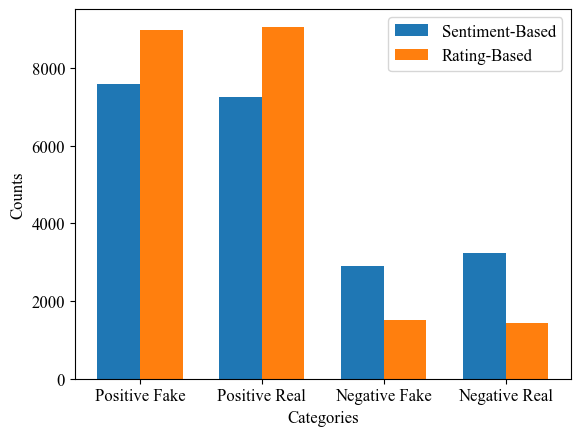

In [147]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import font_manager

# Define the categories and their counts
categories = ['Positive Fake', 'Positive Real', 'Negative Fake', 'Negative Real']
sentiment_counts = [positive_sentiment_fake_count, positive_sentiment_real_count, negative_sentiment_fake_count, negative_sentiment_real_count]
rating_counts = [positive_rating_fake_count, positive_rating_real_count, negative_rating_fake_count, negative_rating_real_count]

# Set the positions of the bars on the x-axis
x = np.arange(len(categories))

# Set the width of the bars
width = 0.35

# Create the grouped bar chart
fig, ax = plt.subplots()

# Set the font properties
font_prop = font_manager.FontProperties(family='Times New Roman', size=12)

rects1 = ax.bar(x - width/2, sentiment_counts, width, label='Sentiment-Based')
rects2 = ax.bar(x + width/2, rating_counts, width, label='Rating-Based')

# Add labels, title, and legend with the specified font properties
ax.set_ylabel('Counts', fontproperties=font_prop)
ax.set_xlabel('Categories', fontproperties=font_prop)
ax.set_xticks(x)
ax.set_xticklabels(categories, fontproperties=font_prop)
ax.legend(prop=font_prop)

# Set the font properties for the tick labels
plt.setp(ax.get_xticklabels(), fontproperties=font_prop)
plt.setp(ax.get_yticklabels(), fontproperties=font_prop)

# Show the plot
plt.show()

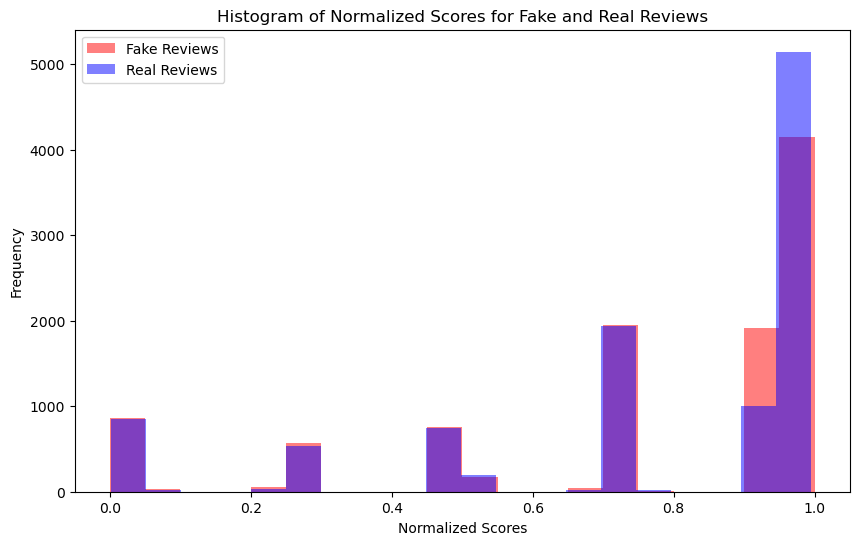

Fake Reviews:
Mean: 0.7492440684221648
Standard Deviation: 0.29670083936524766

Real Reviews:
Mean: 0.7557760186123919
Standard Deviation: 0.29346832063169426


In [127]:
import matplotlib.pyplot as plt

fake_reviews = dataset[dataset['LABEL'] == 1]
real_reviews = dataset[dataset['LABEL'] == 0]

plt.figure(figsize=(10, 6))
plt.hist(fake_reviews['normalized_scores'], bins=20, alpha=0.5, color='red', label='Fake Reviews')
plt.hist(real_reviews['normalized_scores'], bins=20, alpha=0.5, color='blue', label='Real Reviews')
plt.xlabel('Normalized Scores')
plt.ylabel('Frequency')
plt.title('Histogram of Normalized Scores for Fake and Real Reviews')
plt.legend()
plt.show()

# Numerical results
fake_reviews_mean = fake_reviews['normalized_scores'].mean()
real_reviews_mean = real_reviews['normalized_scores'].mean()
fake_reviews_std = fake_reviews['normalized_scores'].std()
real_reviews_std = real_reviews['normalized_scores'].std()

print("Fake Reviews:")
print("Mean:", fake_reviews_mean)
print("Standard Deviation:", fake_reviews_std)
print()
print("Real Reviews:")
print("Mean:", real_reviews_mean)
print("Standard Deviation:", real_reviews_std)

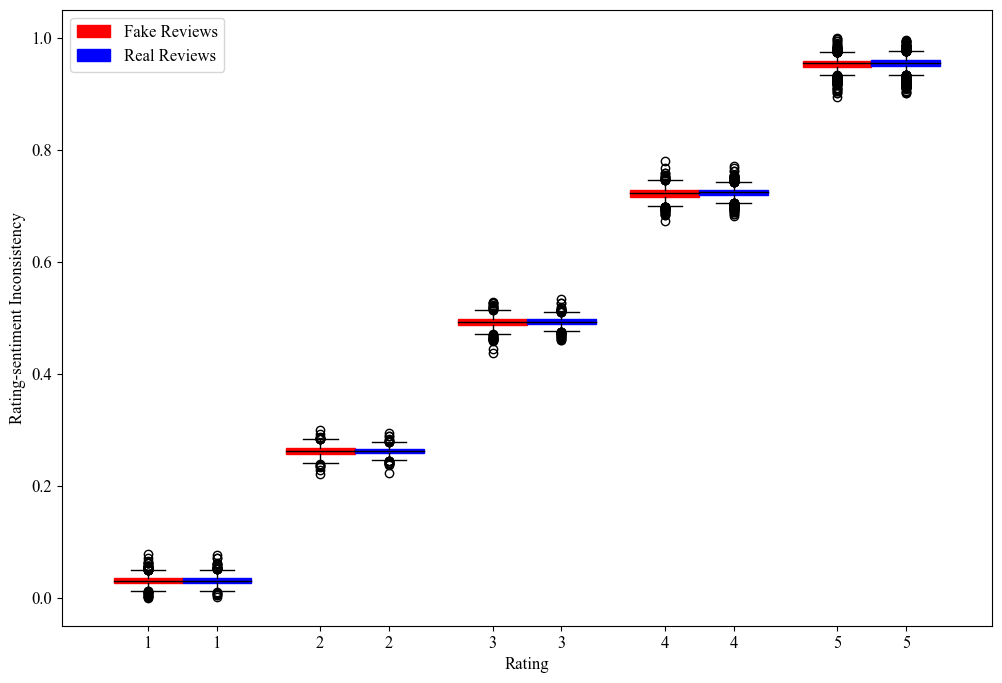

In [148]:
import matplotlib.pyplot as plt
from matplotlib import font_manager

ratings = [1, 2, 3, 4, 5]

fake_reviews = dataset[dataset['LABEL'] == 1]
real_reviews = dataset[dataset['LABEL'] == 0]

plt.figure(figsize=(12, 8))

box_data_fake = []
box_data_real = []

for rating in ratings:
    fake_reviews_rating = fake_reviews[fake_reviews['RATING'] == rating]
    real_reviews_rating = real_reviews[real_reviews['RATING'] == rating]
    
    box_data_fake.append(fake_reviews_rating['normalized_scores'])
    box_data_real.append(real_reviews_rating['normalized_scores'])

# Set the font properties
font_prop = font_manager.FontProperties(family='Times New Roman', size=12)

fake_boxes = plt.boxplot(box_data_fake, positions=[x-0.2 for x in ratings], widths=0.4, labels=ratings, patch_artist=True, boxprops=dict(facecolor='red', color='red'), medianprops=dict(color='black'))
real_boxes = plt.boxplot(box_data_real, positions=[x+0.2 for x in ratings], widths=0.4, labels=ratings, patch_artist=True, boxprops=dict(facecolor='blue', color='blue'), medianprops=dict(color='black'))

# Add labels and legend with the specified font properties
plt.xlabel('Rating', fontproperties=font_prop)
plt.ylabel('Rating-sentiment Inconsistency', fontproperties=font_prop)
plt.legend([fake_boxes['boxes'][0], real_boxes['boxes'][0]], ['Fake Reviews', 'Real Reviews'], prop=font_prop)

# Set the font properties for the tick labels
plt.setp(plt.gca().get_xticklabels(), fontproperties=font_prop)
plt.setp(plt.gca().get_yticklabels(), fontproperties=font_prop)

# Save the figure with 300 dpi in TIFF format
plt.savefig('figure.tiff', dpi=300, format='tiff')

plt.show()

In [70]:
fake_reviews = dataset[dataset['LABEL'] == 1]
real_reviews = dataset[dataset['LABEL'] == 0]

fake_scores = fake_reviews['normalized_scores']
real_scores = real_reviews['normalized_scores']

# Calculate statistical measures for fake reviews
fake_mean = fake_scores.mean()
fake_median = fake_scores.median()
fake_std = fake_scores.std()

# Calculate statistical measures for real reviews
real_mean = real_scores.mean()
real_median = real_scores.median()
real_std = real_scores.std()

print("Fake Reviews - Mean:", fake_mean)
print("Fake Reviews - Median:", fake_median)
print("Fake Reviews - Standard Deviation:", fake_std)
print()
print("Real Reviews - Mean:", real_mean)
print("Real Reviews - Median:", real_median)
print("Real Reviews - Standard Deviation:", real_std)

Fake Reviews - Mean: 0.7492440684221648
Fake Reviews - Median: 0.9440646364201367
Fake Reviews - Standard Deviation: 0.29670083936524766

Real Reviews - Mean: 0.7557760186123919
Real Reviews - Median: 0.9449176811806139
Real Reviews - Standard Deviation: 0.29346832063169426


In [74]:
from scipy.stats import ttest_ind

fake_reviews = dataset[dataset['LABEL'] == 1]
real_reviews = dataset[dataset['LABEL'] == 0]

fake_scores = fake_reviews['sentiment']
real_scores = real_reviews['sentiment']

# Perform t-test
t_statistic, p_value = ttest_ind(fake_scores, real_scores)

print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

T-Statistic: 5.444197614261098
P-Value: 5.2622660341982927e-08


In [39]:
dataset = dataset.drop('REVIEW_TEXT', axis=1)

KeyError: "['REVIEW_TEXT'] not found in axis"

In [40]:
dataset.head(5)

DOC_ID  LABEL  RATING VERIFIED_PURCHASE PRODUCT_CATEGORY  PRODUCT_ID  \
0       1      1       4                 N               PC  B00008NG7N   
1       2      1       4                 Y         Wireless  B00LH0Y3NM   
2       3      1       3                 N             Baby  B000I5UZ1Q   
3       4      1       4                 N  Office Products  B003822IRA   
4       5      1       4                 N           Beauty  B00PWSAXAM   

                                       PRODUCT_TITLE  \
0        Targus PAUK10U Ultra Mini USB Keypad, Black   
1  Note 3 Battery : Stalion Strength Replacement ...   
2       Fisher-Price Papasan Cradle Swing, Starlight   
3  Casio MS-80B Standard Function Desktop Calculator   
4  Shine Whitening - Zero Peroxide Teeth Whitenin...   

               REVIEW_TITLE  \
0                    useful   
1     New era for batteries   
2  doesn't swing very well.   
3          Great computing!   
4     Only use twice a week   

                                       ORIGINAL_TEXT  normalized_scores  \
0  When least you think so, this product will sav...           0.726538   
1  Lithium batteries are something new introduced...           0.723638   
2  I purchased this swing for my baby. She is 6 m...           0.483963   
3  I was looking for an inexpensive desk calcolat...           0.726538   
4  I only use it twice a week and the results are...           0.726538   

    incon  
0  Medium  
1  Medium  
2     Low  
3  Medium  
4  Medium

In [41]:
dataset.to_csv(r'C:\Users\ki_shari\Downloads\DFF.csv', index=False)